# Figure for Ensemble Sizes Result
## Initialisation

In [10]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from matplotlib import cm

import initialise
from display_utils import display_frames

In [2]:
model_dir1 = r'G:\My Drive\LFMC Data\LFMC_ensembles\Models\out-of-site_models'
model_dir2 = r'G:\My Drive\LFMC Data\LFMC_ensembles\Models\yearly_models'
output_dir = r'G:\My Drive\LFMC Data\LFMC_ensembles\Figures'

In [3]:
model = 'base'
ensemble_runs = 50
ensemble_sizes = [1] + list(range(5, 30, 5))
ensemble_names = ['Single model'] + [f'Ensemble {size}' for size in ensemble_sizes[1:]]

## Get the samples and predictions

In [4]:
y1 = pd.read_csv((os.path.join(model_dir1, 'run0', 'predictions.csv')), index_col=0).y
predict1 = []
all_stats1 = []
for num, test in enumerate(ensemble_names):
    if num == 0:
        file_name = f'single_{model}.csv'
        stats_fname = f"single_stats.csv"
    else:
        file_name = f"ensemble{ensemble_sizes[num]:02}_{model}.csv"
        stats_fname = f"ensemble{ensemble_sizes[num]:02}_stats.csv"
    df = pd.read_csv(os.path.join(model_dir1, file_name), index_col=0)
    predict1.extend([pd.DataFrame({'y': y1, model: pred_[1]}) for pred_ in df.iteritems()])
    all_stats1.append(pd.read_csv(os.path.join(model_dir1, stats_fname), index_col=(0,1)))
means1 = [stats_.mean(axis=1).unstack() for stats_ in all_stats1]
variances1 = [stats_.var(axis=1).unstack() for stats_ in all_stats1]

In [12]:
ci_dict1 = {}
for n, t in enumerate(all_stats1):
    a = t.loc[model].T
    ci = stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
    ci_dict1[ensemble_names[n]] = pd.DataFrame([means1[n].loc['base'].array, ci[0], ci[1]], index=['mean', 'lower', 'upper'], columns=a.columns)
display_frames(ci_dict1.values(), ensemble_names, precision=2)

,Bias,R,R2,RMSE,ubRMSE
mean,0.62,0.70,0.48,26.75,26.73
lower,0.36,0.70,0.48,26.70,26.68
upper,0.88,0.70,0.49,26.80,26.78
,Bias,R,R2,RMSE,ubRMSE
mean,0.65,0.73,0.53,25.59,25.58
lower,0.55,0.73,0.53,25.57,25.56
upper,0.76,0.73,0.53,25.61,25.60
,Bias,R,R2,RMSE,ubRMSE
mean,0.63,0.73,0.53,25.44,25.43
lower,0.58,0.73,0.53,25.43,25.42


In [8]:
y2 = pd.read_csv((os.path.join(model_dir2, 'run0', 'predictions.csv')), index_col=0).y
predict2 = []
all_stats2 = []
for num, test in enumerate(ensemble_names):
    if num == 0:
        file_name = f'single_{model}.csv'
        stats_fname = f"single_stats.csv"
    else:
        file_name = f"ensemble{ensemble_sizes[num]:02}_{model}.csv"
        stats_fname = f"ensemble{ensemble_sizes[num]:02}_stats.csv"
    df = pd.read_csv(os.path.join(model_dir2, file_name), index_col=0)
    predict2.extend([pd.DataFrame({'y': y2, model: pred_[1]}) for pred_ in df.iteritems()])
    all_stats2.append(pd.read_csv(os.path.join(model_dir2, stats_fname), index_col=(0,1)))
means2 = [stats_.mean(axis=1).unstack() for stats_ in all_stats2]
variances2 = [stats_.var(axis=1).unstack() for stats_ in all_stats2]

In [9]:
ci_dict2 = {}
for n, t in enumerate(all_stats2):
    a = t.loc[model].T
    ci = stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
    ci_dict2[ensemble_names[n]] = pd.DataFrame([means2[n].loc['base'].array, ci[0], ci[1]], index=['mean', 'lower', 'upper'], columns=a.columns)
display_frames(ci_dict2.values(), ensemble_names, precision=2)

## Results Summary
### Out-of-site Ensembles

In [7]:
precision = 2
df_list1 = []
for num, test in enumerate(ensemble_names):
    first = num * ensemble_runs
    last = first + ensemble_runs
    df_dict={}
    df_dict.update(ci_dict1[test].RMSE.round(precision).add_prefix('RMSE_').to_dict())
    df = pd.concat([predict1[i][model] for i in range(first, last)], axis=1, ignore_index=True).round(precision)
    df_dict['Pred_var'] = round(df.var(axis=1).mean(), precision)
    df_dict.update(ci_dict1[test].R2.round(precision).add_prefix('R2_').to_dict())
    df_list1.append(df_dict)
pd.DataFrame(df_list1, index=ensemble_names)

,RMSE_mean,RMSE_lower,RMSE_upper,Pred_var,R2_mean,R2_lower,R2_upper
Single model,26.75,26.70,26.80,76.19,0.48,0.48,0.49
Ensemble 5,25.59,25.57,25.61,13.97,0.53,0.53,0.53
Ensemble 10,25.44,25.43,25.46,6.07,0.53,0.53,0.53
Ensemble 15,25.40,25.39,25.41,3.61,0.53,0.53,0.53
Ensemble 20,25.36,25.35,25.37,2.26,0.54,0.53,0.54
Ensemble 25,25.36,25.35,25.36,1.52,0.54,0.54,0.54


### Yearly Ensembles

In [11]:
precision = 2
df_list2 = []
for num, test in enumerate(ensemble_names):
    first = num * ensemble_runs
    last = first + ensemble_runs
    df_dict={}
    df_dict.update(ci_dict2[test].RMSE.round(precision).add_prefix('RMSE_').to_dict())
    df = pd.concat([predict2[i][model] for i in range(first, last)], axis=1, ignore_index=True).round(precision)
    df_dict['Pred_var'] = round(df.var(axis=1).mean(), precision)
    df_dict.update(ci_dict2[test].R2.round(precision).add_prefix('R2_').to_dict())
    df_list2.append(df_dict)
pd.DataFrame(df_list2, index=ensemble_names)

,RMSE_mean,RMSE_lower,RMSE_upper,Pred_var,R2_mean,R2_lower,R2_upper
Single model,22.89,22.83,22.95,82.84,0.63,0.63,0.64
Ensemble 5,21.37,21.35,21.39,15.04,0.68,0.68,0.68
Ensemble 10,21.21,21.19,21.22,6.63,0.69,0.68,0.69
Ensemble 15,21.13,21.12,21.14,3.84,0.69,0.69,0.69
Ensemble 20,21.11,21.10,21.12,2.48,0.69,0.69,0.69
Ensemble 25,21.08,21.07,21.09,1.66,0.69,0.69,0.69


## Ensembles Figure

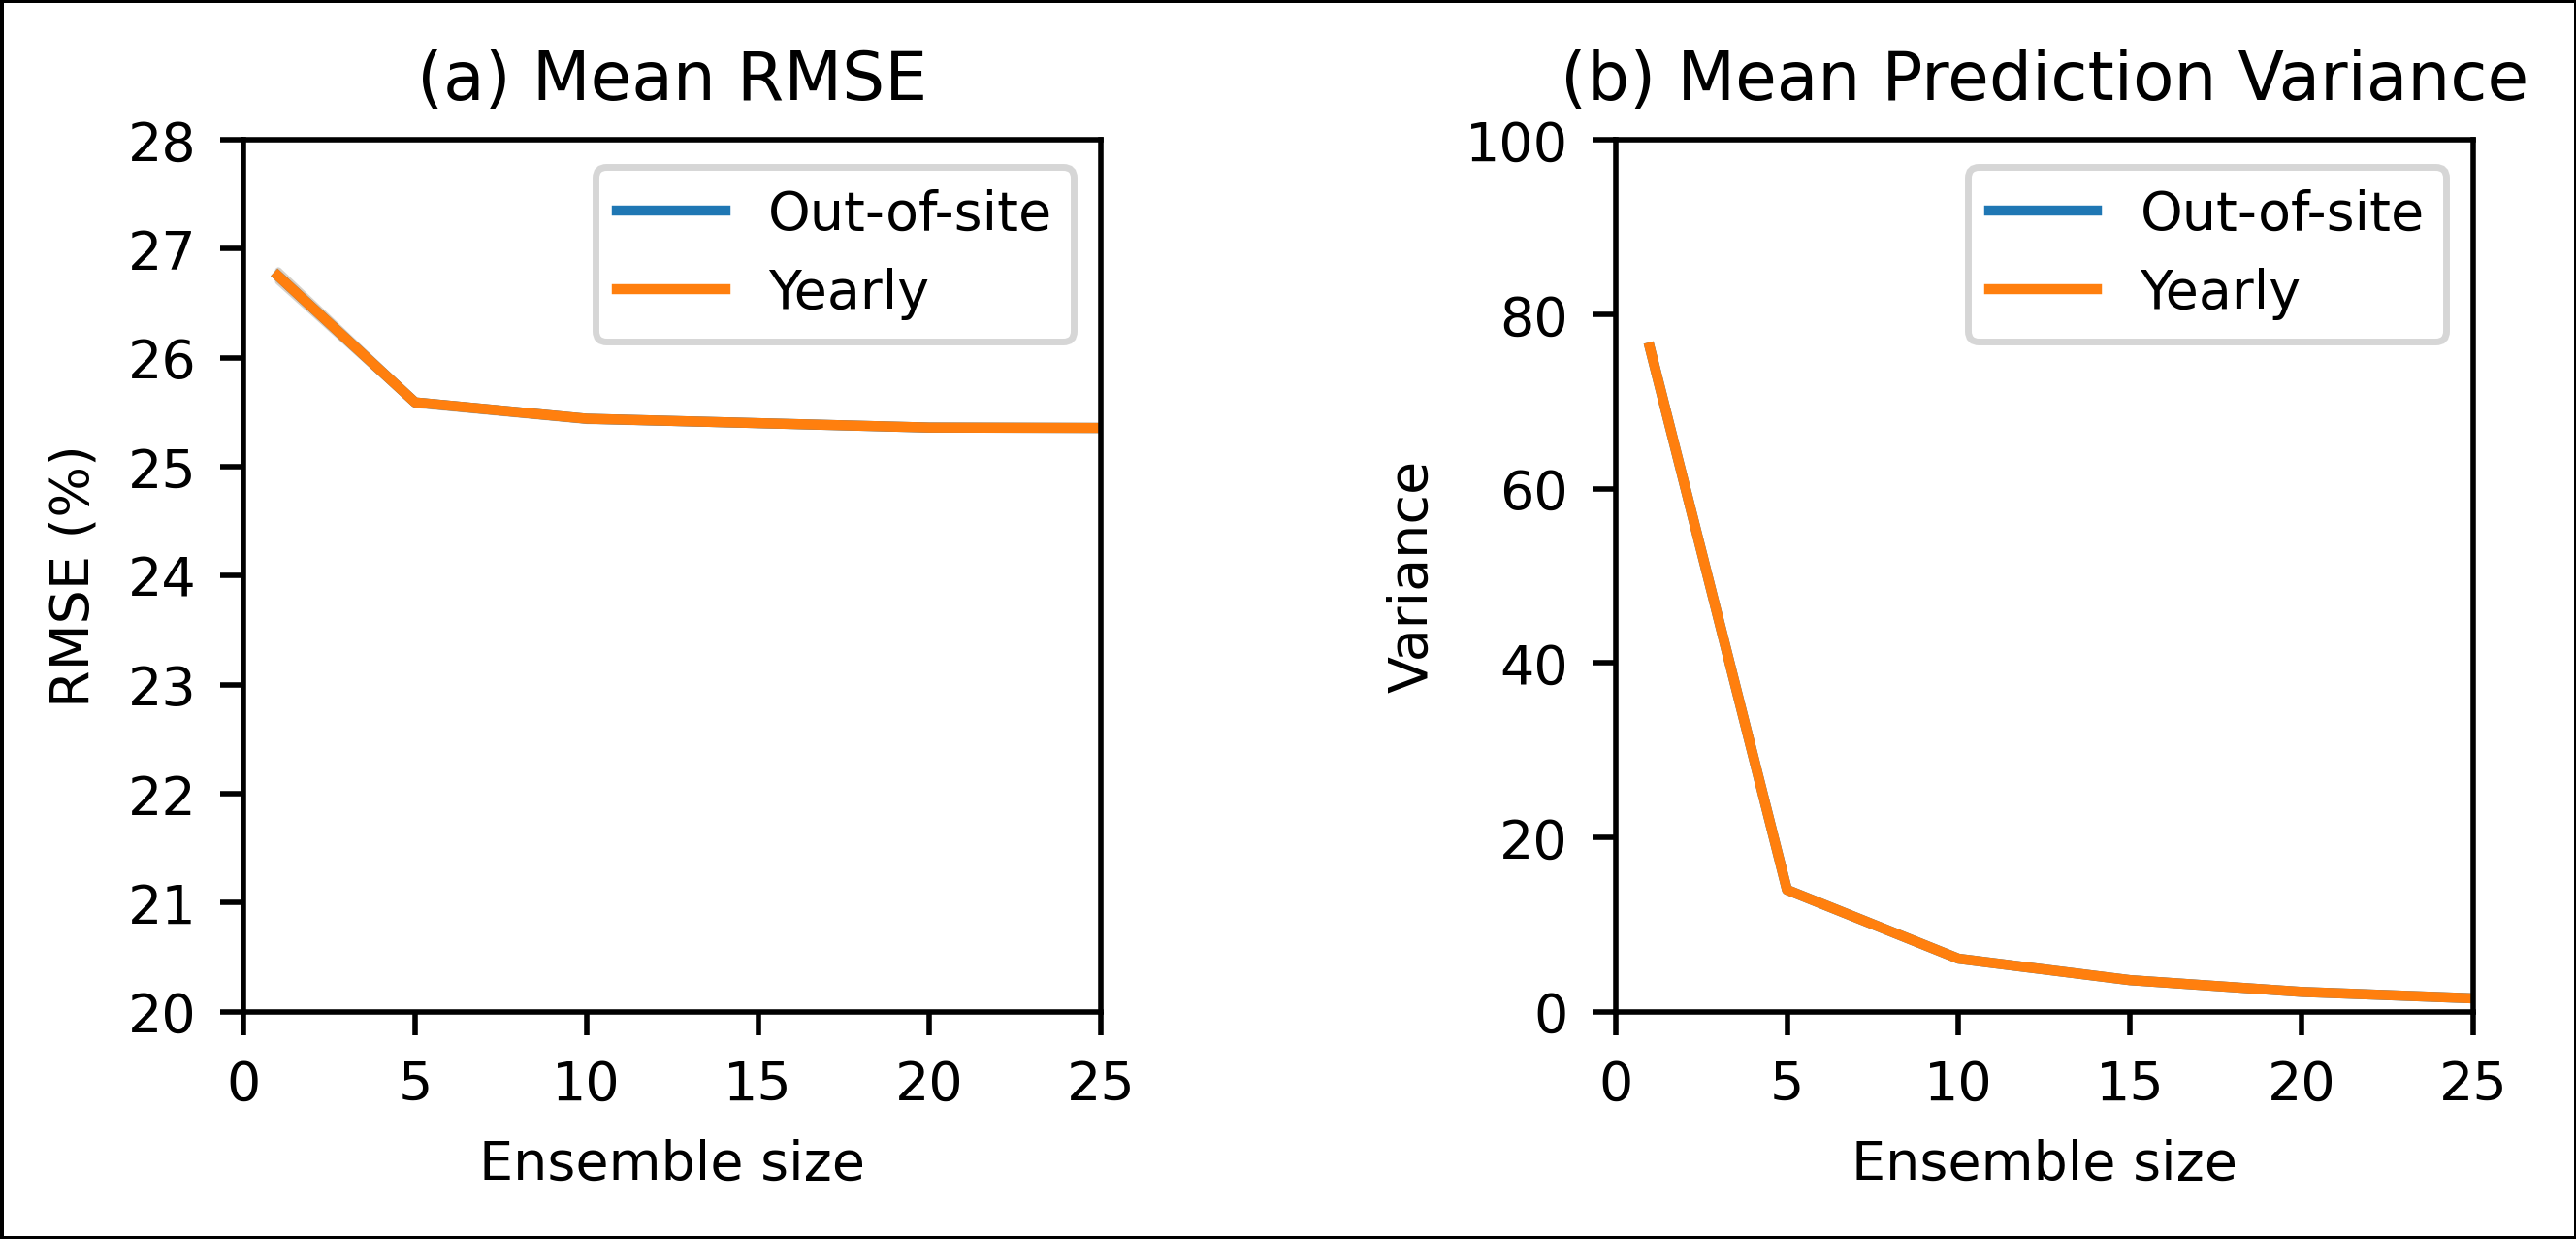

In [8]:
font_size = 8
plt.rcParams.update({'font.size': font_size})
fig = plt.figure(constrained_layout=False, figsize=(5.932, 2.38), dpi=500, linewidth=1, edgecolor="black")

plt.subplot(121)
data1_ = pd.DataFrame({ensemble_sizes[n]: stats_.loc[model, 'RMSE'] for n, stats_ in enumerate(all_stats1)}).melt(
    var_name='Ensemble size', value_name = 'RMSE')
data1_['model'] = 'Out-of-site'
data2_ = pd.DataFrame({ensemble_sizes[n]: stats_.loc[model, 'RMSE'] for n, stats_ in enumerate(all_stats2)}).melt(
    var_name='Ensemble size', value_name = 'RMSE')
data2_['model'] = 'Yearly'
data_ = pd.concat([data1_, data2_]).reset_index()
plt.ylim(20, 28)
plt.xlim(0, 25)
ax = sns.lineplot(x='Ensemble size', y='RMSE', hue='model', data=data_)
plt.title('(a) Mean RMSE', size=10)
plt.ylabel('RMSE (%)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

plt.subplot(122)
data1_ = pd.DataFrame(df_list1, index=ensemble_names)
data1_['model'] = 'Out-of-site'
data1_['Ensemble size'] = ensemble_sizes
data2_ = pd.DataFrame(df_list2, index=ensemble_names)
data2_['model'] = 'Yearly'
data2_['Ensemble size'] = ensemble_sizes
data_ = pd.concat([data1_, data2_]).reset_index(drop=True)
ax = sns.lineplot(x='Ensemble size', y='Pred_var', hue='model', data=data_)
plt.title('(b) Mean Prediction Variance', size=10)
plt.ylim(0, 100)
plt.xlim(0, 25)
plt.ylabel('Variance')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

plt.subplots_adjust(wspace=0.6)
fig.savefig(os.path.join(output_dir, 'Ensemble sizes.jpeg'), format="jpeg", bbox_inches='tight', pad_inches=0.2, dpi=500)